In [8]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load MATLAB file
mat_file = r'C:\Device5_ 1.mat' 
mat_data = scipy.io.loadmat(mat_file)
measurement = mat_data['measurement']
transient = measurement['transient']

ce_data = transient[0,0][0][i][2][0][0][3][0]

In [26]:
transient[0,0][0][0]

(array(['12/24/2008 12:13:54 PM.168751239'], dtype='<U32'), array([[3.31299443e+09]]), array([[(array([[8.e-09]]), array([[-0.12499958, -0.13671833, -0.12109333, ..., -0.12109333,
                -0.11328083, -0.12499958]]), array([[-0.16015582, -0.17578082, -0.16796832, ..., -0.17578082,
                -0.19531207, -0.19140582]]), array([[2.4609375 , 2.47558594, 2.46826172, ..., 2.45605468, 2.45605468,
                2.45361328]]), array([[0.14975977, 0.17429942, 0.14157988, ..., 0.16611953, 0.22337872,
                0.21519883]]))                                                                                       ]],
      dtype=[('dt', 'O'), ('gateSignalVoltage', 'O'), ('gateEmitterVoltage', 'O'), ('collectorEmitterVoltage', 'O'), ('collectorEmitterCurrentSignal', 'O')]), array([[(array([[1]], dtype=uint8), array([], shape=(1, 0), dtype=uint8), array([], shape=(1, 0), dtype=uint8), array([], shape=(1, 0), dtype=uint8), array([], shape=(1, 0), dtype=uint8), array([[1]], dtype=u

(array(['12/24/2008 12:13:53 PM'], dtype='<U22'), array([[3.31299443e+09]]), array([[99]], dtype=uint8), array([[100]], dtype=uint8), array([[115]], dtype=uint8), array([[8]], dtype=uint8), array([[2.5]]), array([[1000]], dtype=uint16), array([[40]], dtype=uint8), array([[0]], dtype=uint8))

In [16]:
ce_data

(array(['12/24/2008 12:14:42 PM.364751338'], dtype='<U32'), array([[3.31299448e+09]]), array([[(array([[1.6e-08]]), array([[-1.30749146, -2.86999155, -1.30749146, ..., -1.30749146,
                -2.86999155, -1.30749146]]), array([[4.45249933, 4.13999936, 4.13999936, ..., 4.13999936, 4.45249933,
                4.13999936]]), array([[2.21925007, 2.25050007, 2.21925007, ..., 2.25050007, 2.25050007,
                2.25050007]]), array([[1.6954949 , 1.48440114, 1.48440114, ..., 1.48440114, 1.48440114,
                1.6954949 ]]))                                                                                       ]],
      dtype=[('dt', 'O'), ('gateSignalVoltage', 'O'), ('gateEmitterVoltage', 'O'), ('collectorEmitterVoltage', 'O'), ('collectorEmitterCurrentSignal', 'O')]), array([[(array([[1]], dtype=uint8), array([], shape=(1, 0), dtype=uint8), array([], shape=(1, 0), dtype=uint8), array([], shape=(1, 0), dtype=uint8), array([], shape=(1, 0), dtype=uint8), array([[1]], dtype=uint8)

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

mat_data_set = [()]
# Load MATLAB file
mat_file = r'C:\Device5_ 1.mat' 
mat_data = scipy.io.loadmat(mat_file)
mat_data_set = np.append(mat_data_set, mat_data)

mat_file = r'C:\Device2  1.mat' 
mat_data = scipy.io.loadmat(mat_file)
mat_data_set = np.append(mat_data_set, mat_data)

mat_file = r'C:\Device3  1.mat' 
mat_data = scipy.io.loadmat(mat_file)
mat_data_set = np.append(mat_data_set, mat_data)

mat_file = r'C:\Device4  1.mat' 
mat_data = scipy.io.loadmat(mat_file)
mat_data_set = np.append(mat_data_set, mat_data)

#j=0 dev5
#j=1 dev2
#j=2 dev3
#j=3 dev4

ce_window_smooth = [None] * len(mat_data_set)

for j in range(len(mat_data_set)):
    measurement = mat_data_set[j]['measurement']
    transient = measurement['transient']
    
    total_time = 0
    new_time = 0
    original = 0 
    time = np.array([])
    ce_data_list = []
    
    for i in range(len(transient[0,0][0])):
        date_str = transient[0,0][0][i][0][0]
        time_str = date_str.split(' ')[1]
        hour, minute, second = map(int, time_str.split(':'))
        
        new_time = hour*3600 + minute*60 + second
        if i == 0:
            original = new_time
        total_time = new_time - original
    
        time = np.append(time, total_time)
        
        ce_data = transient[0,0][0][i][2][0][0][3][0]
        ce_data_list.append(ce_data)
    
    ce_data_array = np.array(ce_data_list) 
    
    ce_sampling_data = [()]
    for i in range(len(ce_data_array)):
        if time[i]>=2000 and np.min(ce_data_array[i])<=4.0:
            break
        ce_sampling_data = np.append(ce_sampling_data, np.average(ce_data_array[i]))
    
    def calculate_weighted_average(x, t, span=15):
        theta = 2 / (span + 1)
        numerator = 0
        denominator = 0
    
        for i in range(t + 1):
            weight = (1 - theta) ** (t - i)
            numerator += weight * x[i]
            denominator += weight
    
        yt = numerator / denominator
        return yt
    
    span = 15
    ce_window_smooth[j] = np.zeros(len(ce_sampling_data))
    for t in range(len(ce_sampling_data)):
        ce_window_smooth[j][t] = calculate_weighted_average(ce_sampling_data, t, span)

print("Done")

Done


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Example: Non-uniform length data arrays
data = [
    np.sin(np.linspace(0, 50, 150)),  # 150 elements
    np.cos(np.linspace(0, 50, 200)),  # 200 elements
    np.sin(np.linspace(0, 25, 180)),  # 180 elements
    np.cos(np.linspace(0, 25, 220))   # 220 elements
]

# Find the minimum length
min_length = min(len(row) for row in data)

# Truncate arrays to the minimum length
data_truncated = np.array([row[:min_length] for row in data])

# Normalize each row
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = np.array([scaler.fit_transform(row.reshape(-1, 1)).flatten() for row in data_truncated])

# Split into training (last 3 rows) and testing (first row)
train_data = torch.tensor(data_scaled[1:], dtype=torch.float32)  # Rows 1 to 3
test_data = torch.tensor(data_scaled[0], dtype=torch.float32)    # Row 0

# Reshape train and test data for CNN
train_data = train_data.unsqueeze(1)  # Add channel dimension (N, C, L)
test_data = test_data.unsqueeze(0).unsqueeze(0)  # Add batch and channel dims (1, 1, L)

# Define custom dataset
class TimeSeriesDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx, :-1]  # Use all except last value as input
        y = self.data[idx, 1:]   # Use all except first value as target
        return x.unsqueeze(0), y.unsqueeze(0)  # Add channel dimension

# Create dataset and dataloader
dataset = TimeSeriesDataset(train_data)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Define CNN model
class TimeSeriesCNN(nn.Module):
    def __init__(self):
        super(TimeSeriesCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * (min_length // 2 // 2), 50)
        self.fc2 = nn.Linear(50, min_length - 1)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, loss function, and optimizer
model = TimeSeriesCNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.view(outputs.shape))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(dataloader):.4f}")

# Test the model
model.eval()
with torch.no_grad():
    predictions = model(test_data)
    predictions = predictions.squeeze(0).numpy()

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(data_scaled[0][1:], label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.show()


RuntimeError: Expected 2D (unbatched) or 3D (batched) input to conv1d, but got input of size: [2, 1, 0, 150]

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)  # LSTM returns output and hidden state
        out = self.fc(out[:, -1, :])  # Use the last time step's output
        return out

# Instantiate model, define loss function and optimizer
model = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for q in range(len(mat_data_set)):
    if q in [1, 2, 3]:
        data = ce_window_smooth[q]
        
        # Prepare sliding window dataset
        window_size = 1
        inputs = []
        labels = []
        for i in range(len(data) - window_size+1):
            inputs.append(data[i:i + window_size])
            labels.append(data[i + window_size-1])
        
        inputs = torch.tensor(np.array(inputs), dtype=torch.float32)  # Convert numpy array to tensor
        labels = torch.tensor(np.array(labels), dtype=torch.float32).unsqueeze(1)  # Convert numpy array to tensor
        
        # Reshape inputs to match RNN input format
        inputs = inputs.unsqueeze(1)  # Shape: [93, 1, 10] (batch_size, seq_len, input_size)

        # Train the model
        epochs = 5000
        for epoch in range(epochs):
            model.train()
            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            #print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

test_data_index=0
data = ce_window_smooth[0]
        
# Prepare sliding window dataset
window_size = 1
inputs = []
labels = []
for i in range(len(data) - window_size+1):
    inputs.append(data[i:i + window_size])
    labels.append(data[i + window_size-1])

inputs = torch.tensor(np.array(inputs), dtype=torch.float32)  # Convert numpy array to tensor
labels = torch.tensor(np.array(labels), dtype=torch.float32).unsqueeze(1)  # Convert numpy array to tensor

# Reshape inputs to match RNN input format
inputs = inputs.unsqueeze(1)  # Shape: [93, 1, 10] (batch_size, seq_len, input_size)

# Evaluate the model
model.eval()
with torch.no_grad():
    output_array = model(inputs).squeeze().numpy()

    #print("Final outputs:", output_array[q])
print("Done")

Done


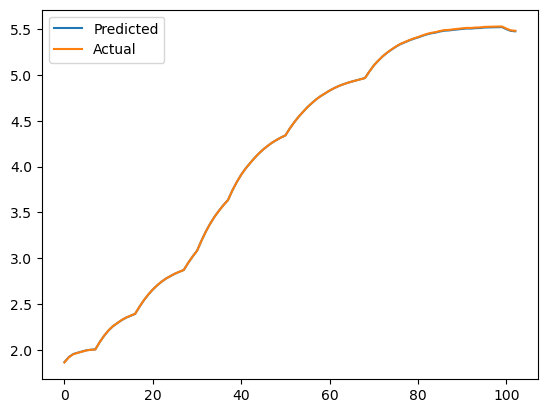

In [44]:
# Plot results
plt.plot(output_array, label='Predicted')
plt.plot(ce_window_smooth[0], label='Actual')
plt.legend()
plt.show()

In [45]:
import numpy as np

# Function to calculate MSE
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Function to calculate R² (Coefficient of Determination)
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)  # Residual sum of squares
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # Total sum of squares
    return 1 - (ss_res / ss_tot)

# Function to calculate MAE
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

print("Done")

Done


In [46]:
y_true = ce_window_smooth[0]

y_pred = output_array
# Calculate MSE
mse = mean_squared_error(y_true, y_pred)

# Calculate R²
r2 = r2_score(y_true, y_pred)*100

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)

print(mse)
print(r2)
print(mae)

9.260474057085168e-06
99.99941532225962
0.0019554989396350165


In [17]:
for q in range(len(mat_data_set)):
    len_ori = len(ce_window_smooth[q])
    print(len_ori)

103
106
96
91


In [18]:
ce_window_smooth_new = [None]*len(mat_data_set)
len_larger = len(ce_window_smooth[3])
for q in range(len(mat_data_set)):
    ce_window_smooth_new[q] = ce_window_smooth[q][0:len_larger]
    #print(len(output_array_new[q])-len(ce_window_smooth[q])

In [19]:
for q in range(len(mat_data_set)):
    len_ori = len(ce_window_smooth_new[q])
    print(len_ori)

91
91
91
91


In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split

# Example input data (4 rows of 91 elements each)
# Replace this with your actual data
data = ce_window_smooth_new  # 4x91 matrix for example

# Split into training and testing data
train_data = data[1:4]  # First three rows for training
test_data = data[0]  # Fourth row for testing

# Convert to PyTorch tensors
train_data = torch.tensor(train_data, dtype=torch.float32)
test_data = torch.tensor(test_data, dtype=torch.float32)

# Define a simple 1D CNN model
class CNN1D(nn.Module):
    def __init__(self):
        super(CNN1D, self).__init__()
        # Define the layers
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)  # Convolutional Layer 1
        self.relu = nn.ReLU()  # ReLU activation
        self.fc1 = nn.Linear(16, 1)  # Fully connected layer (16 channels, output size after convolution)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension (1 channel in this case)
        x = self.conv1(x)  # Convolution operation
        x = self.relu(x)  # Apply ReLU activation
        x = x.view(x.size(0), -1)  # Flatten the output
        x = self.fc1(x)  # Fully connected layer
        return x

# Instantiate the model
model = CNN1D()

# Define loss and optimizer
criterion = nn.MSELoss()  # Mean Squared Error for regression tasks
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop (element-wise training)
num_epochs = 100
for epoch in range(num_epochs):
    for i in range(train_data.shape[1]):  # Iterate over each element in a row (columns)
        input_data = train_data[:, i].unsqueeze(1)  # Select one element at a time from all rows (indexing all rows in the i-th column)
        target = test_data[i]  # Target is the corresponding element from the test data (same index)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(input_data)

        # Calculate loss
        loss = criterion(output, target.unsqueeze(0))

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Print the loss for the current epoch
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the model on the test data (element-wise)
with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    test_output = []
    for i in range(test_data.shape[0]):
        test_input = test_data[i].unsqueeze(0)  # Input for testing (one element at a time)
        output = model(test_input.unsqueeze(0))
        test_output.append(output.item())
    print(f'Test output: {test_output}')


C:\Users\JASH\anaconda3\envs\scsqr_iitkgp\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Loss: 0.1147
Epoch [20/100], Loss: 0.0620
Epoch [30/100], Loss: 0.0609
Epoch [40/100], Loss: 0.0641
Epoch [50/100], Loss: 0.0661
Epoch [60/100], Loss: 0.0672
Epoch [70/100], Loss: 0.0679
Epoch [80/100], Loss: 0.0686
Epoch [90/100], Loss: 0.0693
Epoch [100/100], Loss: 0.0700
Test output: [1.485935926437378, 1.5557907819747925, 1.597910761833191, 1.615975260734558, 1.6328572034835815, 1.6499271392822266, 1.657095193862915, 1.6622716188430786, 1.7624295949935913, 1.8490461111068726, 1.9213523864746094, 1.9781938791275024, 2.0209968090057373, 2.062042236328125, 2.0951085090637207, 2.1201109886169434, 2.1450650691986084, 2.242631673812866, 2.330331802368164, 2.4074254035949707, 2.4741458892822266, 2.531045436859131, 2.580573081970215, 2.622309684753418, 2.6556246280670166, 2.6876237392425537, 2.7133712768554688, 2.7376365661621094, 2.8333630561828613, 2.9195361137390137, 2.9968209266662598, 3.1327602863311768, 3.2574105262756348, 3.3658559322357178, 3.460059881210327, 3.5416

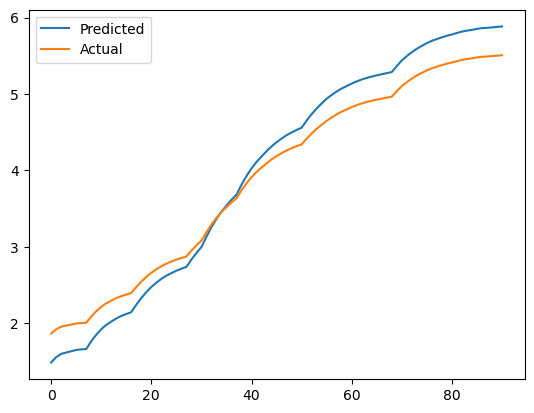

In [79]:
# Plot results
plt.plot(test_output, label='Predicted')
plt.plot(ce_window_smooth_new[0], label='Actual')
plt.legend()
plt.show()

In [80]:
y_true = ce_window_smooth_new[0]

y_pred = test_output
# Calculate MSE
mse_cnn = mean_squared_error(y_true, y_pred)

# Calculate R²
r2_cnn = r2_score(y_true, y_pred)*100

# Calculate MAE
mae_cnn = mean_absolute_error(y_true, y_pred)

print(mse_cnn)
print(r2_cnn)
print(mae_cnn)

0.07652652275497256
94.88249994670014
0.2550957571938719
